In [3]:
import numpy as np
import pandas as pd

import statsmodels.api as sm
from statsmodels.formula.api import ols

In the context of an ANOVA table or regression analysis output like the one you've presented, "Residual" refers to the portion of the total variation in the dependent variable that is not explained by the independent variables in the model. Here's a breakdown of the Residual row in your ANOVA table:


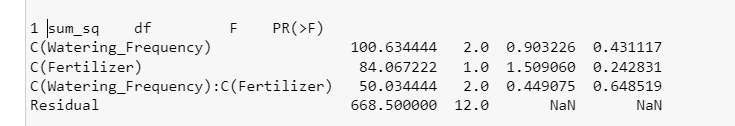

- **sum_sq (Sum of Squares for Residuals)**: This represents the sum of the squared differences between the observed values and the values predicted by the model. In your table, `668.500000` is the sum of these squared differences across all observations in the data. It's a measure of the model's error or the variability in the response variable that isn't accounted for by the independent variables.

- **df (Degrees of Freedom for Residuals)**: This is the number of independent pieces of information upon which the estimate of variance is based. For residuals, it's typically the number of observations minus the number of estimated parameters. In your case, there are `12.0` degrees of freedom for the residuals, suggesting there might be 15 observations in total (since the model has three main effects, not counting the interaction term, which would reduce the degrees of freedom by 3).

- **F (F-statistic)**: This column would typically show the calculated F-statistic for each source of variance, used to determine the significance. For residuals, this is not applicable (`NaN`), as the F-statistic is a ratio of the variance explained by a factor to the variance not explained (i.e., the residual variance).

- **PR(>F) (P-value for the F-statistic)**: This column shows the probability of observing the F-statistic, or a more extreme value, under the null hypothesis. For residuals, this is also not applicable (`NaN`), as the residual row does not represent a hypothesis test but rather the leftover variation after accounting for the model's factors.

In summary, the "Residual" row in your ANOVA table tells you about the variation in the data that the model does not explain. A smaller residual sum of squares indicates a model that better fits your data, while a larger sum suggests that the model may be missing some key explanatory variables or that there is inherent variability in the data that cannot be captured by the model.

In [2]:
H0="There is no difference in average performance on the physical endurance test based on gender, supplement dosage, or their interaction."
Ha="There is a significant difference in average performance on the physical endurance test based on gender, supplement dosage, or their interaction."
    

A researcher is interested in determining the effects of different dosages of a dietary supplement on the performance of both males and females on a physical endurance test.

The three different dosages of the medicine are low, medium, and high, and the genders are male and female.

Data: dosages

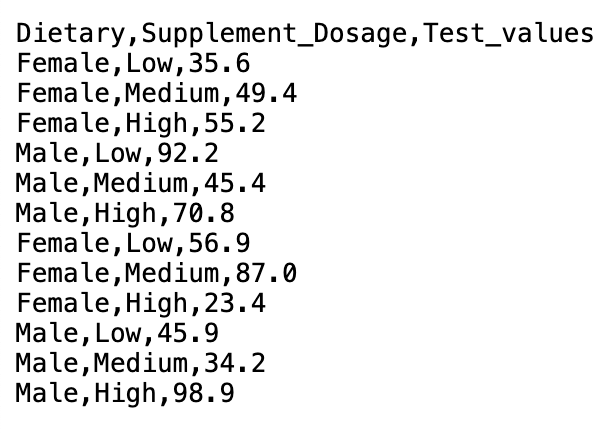

Conduct an appropriate hypothesis test to determine the interaction effects of the test at a 1% significance level.

In [4]:
df=pd.read_csv(r"C:\Users\hp\OneDrive\Desktop\python\Scaler\Hypthesis testing\dosages.csv")
df.head()

,Dietary,Supplement_Dosage,Test_values
0,Female,Low,35.6
1,Female,Medium,49.4
2,Female,High,55.2
3,Male,Low,92.2
4,Male,Medium,45.4


In [6]:
test = ols('Test_values ~ C(Dietary) * C(Supplement_Dosage)', data=df).fit()
print(test.summary())



                            OLS Regression Results                            
Dep. Variable:            Test_values   R-squared:                       0.543
Model:                            OLS   Adj. R-squared:                  0.163
Method:                 Least Squares   F-statistic:                     1.428
Date:                Sun, 31 Mar 2024   Prob (F-statistic):              0.335
Time:                        23:52:29   Log-Likelihood:                -50.093
No. Observations:                  12   AIC:                             112.2
Df Residuals:                       6   BIC:                             115.1
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                                        coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [7]:
anova_table = sm.stats.anova_lm(test, typ = 2)
print(anova_table)

                                      sum_sq   df         F    PR(>F)
C(Dietary)                        532.000833  1.0  1.075214  0.339742
C(Supplement_Dosage)              130.811667  2.0  0.132190  0.878657
C(Dietary):C(Supplement_Dosage)  2869.201667  2.0  2.899438  0.131502
Residual                         2968.715000  6.0       NaN       NaN


sm.stats.anova_lm(test, typ=2): This function is used to perform ANOVA on the fitted OLS model stored in the variable test. ANOVA is a statistical method used to analyze the differences among group means in a sample. In the context of a linear regression model like the one you've fitted, ANOVA is used to determine the overall significance of the model and to test the null hypothesis that a parameter (or group of parameters) has no effec

In [12]:
for value in anova_table['PR(>F)']: 
    if value<0.01: 
        print("reject H0 {value}", H1)
    else: 
        print(f"Fail to reject H0 {value}", H0)

Fail to reject H0 0.3397415503499166 There is no difference in average performance on the physical endurance test based on gender, supplement dosage, or their interaction.
Fail to reject H0 0.8786570319792688 There is no difference in average performance on the physical endurance test based on gender, supplement dosage, or their interaction.
Fail to reject H0 0.13150184509360455 There is no difference in average performance on the physical endurance test based on gender, supplement dosage, or their interaction.
Fail to reject H0 nan There is no difference in average performance on the physical endurance test based on gender, supplement dosage, or their interaction.


A researcher wants to investigate the effects of two different fertilizers (‘A’ & ‘B’) and three watering frequencies (‘Low’, ‘Medium’, ‘High’) on the growth of tomato plants.

Is there a significant interaction between the fertilizer type and watering frequency on plant growth?

Dataset: fertilizer data
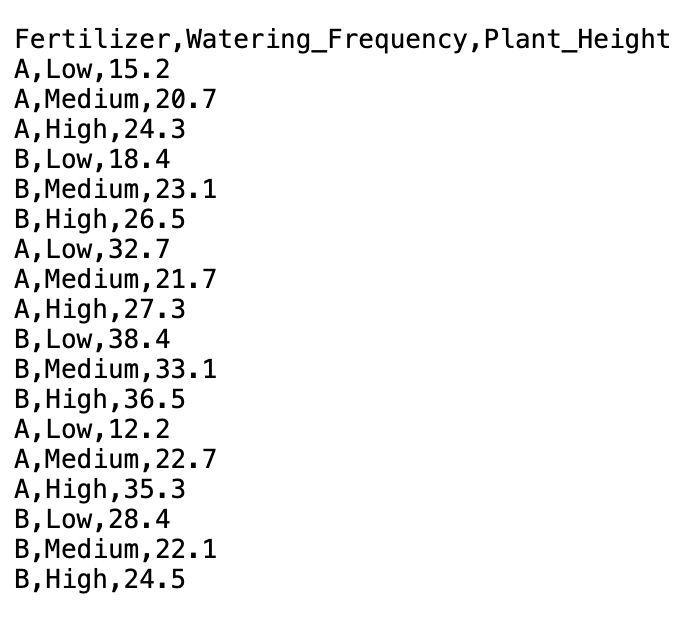

Conduct an appropriate hypothesis test to determine only the interaction effects of this research at a 5% significance level.

In [13]:
df=pd.read_csv(r"C:\Users\hp\OneDrive\Desktop\python\Scaler\Hypthesis testing\fertilizer.csv")
df.head()

,Fertilizer,Watering_Frequency,Plant_Height
0,A,Low,15.2
1,A,Medium,20.7
2,A,High,24.3
3,B,Low,18.4
4,B,Medium,23.1


In [18]:
test=ols('Plant_Height ~ C(Watering_Frequency)*C(Fertilizer)', data=df).fit()
print(test.summary())

                            OLS Regression Results                            
Dep. Variable:           Plant_Height   R-squared:                       0.260
Model:                            OLS   Adj. R-squared:                 -0.048
Method:                 Least Squares   F-statistic:                    0.8427
Date:                Mon, 01 Apr 2024   Prob (F-statistic):              0.545
Time:                        00:03:25   Log-Likelihood:                -58.073
No. Observations:                  18   AIC:                             128.1
Df Residuals:                      12   BIC:                             133.5
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                                         coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [22]:
H0="There is not enough evidence to suggest that there is a significant interaction between the fertilizer type and watering frequency on plant growth"
H1="There is enough evidence to suggest that there is a significant interaction between the fertilizer type and watering frequency on plant growth"

annova_table=sm.stats.anova_lm(test, typ=2)

print(annova_table)

for value in annova_table['PR(>F)'].head(3): 
    if value<0.05: 
        print("reject H0 {value}", H1)
    else: 
        print(f"Fail to reject H0 {value}", H0)

                                         sum_sq    df         F    PR(>F)
C(Watering_Frequency)                100.634444   2.0  0.903226  0.431117
C(Fertilizer)                         84.067222   1.0  1.509060  0.242831
C(Watering_Frequency):C(Fertilizer)   50.034444   2.0  0.449075  0.648519
Residual                             668.500000  12.0       NaN       NaN
Fail to reject H0 0.43111675708448 There is not enough evidence to suggest that there is a significant interaction between the fertilizer type and watering frequency on plant growth
Fail to reject H0 0.24283082844916606 There is not enough evidence to suggest that there is a significant interaction between the fertilizer type and watering frequency on plant growth
Fail to reject H0 0.648519320385655 There is not enough evidence to suggest that there is a significant interaction between the fertilizer type and watering frequency on plant growth


The Committee head of a national entrance exam wants to analyze if there are any differences in learning outcomes between students with different educational backgrounds (high school or college) and teaching methods (traditional or interactive) on test scores.

Data: education

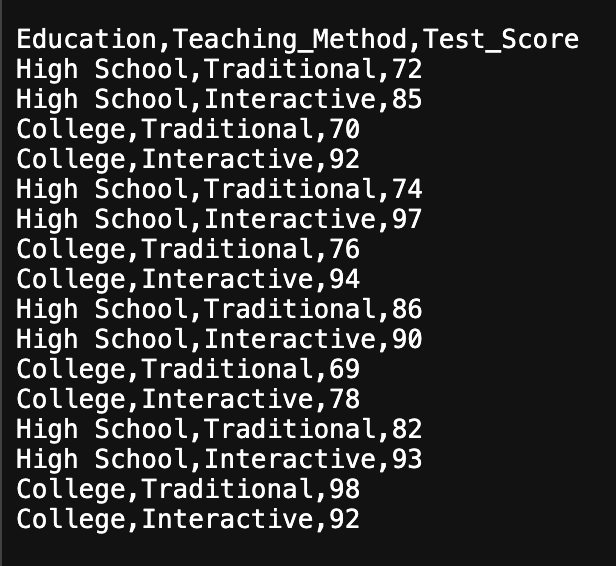

Conduct an appropriate hypothesis test to determine the main effects & interaction effects of the test at a 5% significance level.

In [28]:
df=pd.read_csv(r"C:\Users\hp\OneDrive\Desktop\python\Scaler\Hypthesis testing\education.csv")
df.head()
test=ols('Test_Score ~ C(Teaching_Method) * C(Education)', data=df).fit()
#print(test.summary())
print(test.summary2())



                                        Results: Ordinary least squares
Model:                              OLS                             Adj. R-squared:                    0.224   
Dependent Variable:                 Test_Score                      AIC:                               118.2433
Date:                               2024-04-01 00:20                BIC:                               121.3336
No. Observations:                   16                              Log-Likelihood:                    -55.122 
Df Model:                           3                               F-statistic:                       2.444   
Df Residuals:                       12                              Prob (F-statistic):                0.114   
R-squared:                          0.379                           Scale:                             76.708  
---------------------------------------------------------------------------------------------------------------
                                

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [32]:
annova_table=sm.stats.anova_lm(test, type=2)
print(annova_table)

H0="There is no significant interaction between educational background and teaching method on student performance."
H1="There is significant interaction between educational background and teaching method on student performance."

for value in annova_table['PR(>F)'].head(3): 
    if value<0.05: 
        print("reject H0", H1)
    else: 
        print("Failed to reject H0", H1)

                                   df  sum_sq     mean_sq         F    PR(>F)
C(Teaching_Method)                1.0  552.25  552.250000  7.199348  0.019920
C(Education)                      1.0    6.25    6.250000  0.081477  0.780172
C(Teaching_Method):C(Education)   1.0    4.00    4.000000  0.052146  0.823216
Residual                         12.0  920.50   76.708333       NaN       NaN
reject H0 There is significant interaction between educational background and teaching method on student performance.
Failed to reject H0 There is significant interaction between educational background and teaching method on student performance.
Failed to reject H0 There is significant interaction between educational background and teaching method on student performance.


A data analyst is comparing the sales amounts (in dollars) for two different marketing strategies (A and B). The sales data for 20 days under each strategy is collected.

sales_strategy_A = [156, 153, 157, 154, 156, 159, 152, 156, 157, 154, 153, 157, 157,152, 155, 154, 151, 157, 155, 151]

sales_strategy_B = [135, 147, 126, 136, 158, 139, 163, 141, 156, 142, 130, 129, 161, 158, 117, 151, 121, 135, 123, 153]

Perform an appropriate test to assess if there is a significant difference in the sales distributions between Strategy A and Strategy B. Use a significance level of 0.05.

We can solve this problem using KS Test as we do not have information about the underlying distribution of sales data.

In [52]:
from scipy.stats import kstest
sales_strategy_A = [156, 153, 157, 154, 156, 159, 152, 156, 157, 154, 153, 157, 157,152, 155, 154, 151, 157, 155, 151]

sales_strategy_B = [135, 147, 126, 136, 158, 139, 163, 141, 156, 142, 130, 129, 161, 158, 117, 151, 121, 135, 123, 153]
kstat, p_value=kstest(sales_strategy_A, sales_strategy_B, alternative="two_sided")
print(kstat, p_value)

0.65 0.0002704973445409677


In [49]:
H0="The distributions of sales amounts for Strategy A and Strategy B are identical."
H1="The distributions of sales amounts for Strategy A and Strategy B are not identical"

In [53]:
if p_value<0.05: 
    print(H1)
else: 
    print(H0)

The distributions of sales amounts for Strategy A and Strategy B are not identical


A researcher is investigating the distribution of response times (in seconds) for two different versions of a mobile app, i.e. the time taken for a mobile app to respond to a user action, measured in seconds.


The goal is to determine if the response time distributions significantly differ between the two versions.

Data for 20 users for each app version is collected.

response_times_version_A = [1.2, 1.3, 1.1, 1.4, 1.2, 1.3, 1.0, 1.5, 1.2, 1.3, 1.2, 1.4, 1.1, 1.3, 1.2, 1.5, 1.3, 1.4, 1.2, 1.3]

response_times_version_B = [1.6, 1.2, 1.3, 1.4, 1.1, 1.3, 1.2, 1.5, 1.3, 1.4, 1.2, 1.3, 1.2, 1.4, 1.1, 1.3, 1.5, 1.2, 1.3, 1.4]


In [44]:
response_times_version_A = [1.2, 1.3, 1.1, 1.4, 1.2, 1.3, 1.0, 1.5, 1.2, 1.3, 1.2, 1.4, 1.1, 1.3, 1.2, 1.5, 1.3, 1.4, 1.2, 1.3]

response_times_version_B = [1.6, 1.2, 1.3, 1.4, 1.1, 1.3, 1.2, 1.5, 1.3, 1.4, 1.2, 1.3, 1.2, 1.4, 1.1, 1.3, 1.5, 1.2, 1.3, 1.4]

kstat, p_value=kstest(response_times_version_A, response_times_version_B, alternative="two_sided")
print(kstat, p_value)

Null_Hypothesis_H0="The distributions of response_times_version_A and response_times_version_B are identical."
Alternative_Hypothesis_H1= "The distributions of response_times_version_A and response_times_version_B are not identical."

if p_value<0.05: 
    print(Alternative_Hypothesis_H1)
else: 
    print(Null_Hypothesis_H0)

0.1 0.9999923931635496
The distributions of response_times_version_A and response_times_version_B are identical.


When to do what test? 

One-Way ANOVA:
1. This test is used for comparing the means of more than two groups.
2. In this scenario, we only have two groups (app versions A and B), making ANOVA inappropriate.

Two-Sample Z-test:

1. This test requires the assumption of normality in the population distributions.
2. Since we have no information about the underlying distribution of response times, this assumption cannot be verified, making the two-sample z-test a not appropriate choice.

Paired T-Test:
1. This test is designed for situations where the same subjects are measured under two different conditions.
2. Here, we have different users for each app version, violating the paired assumption.

Two-Sample Z-proportion:
1. This test is specifically designed for comparing proportions, not continuous variables like response times.

KS Test (Kolmogorov-Smirnov Test):
1. This test is ideal for comparing the cumulative distribution functions (CDFs) of two samples.
2. KS test is the most appropriate choice for this scenario because it doesn’t require any assumptions about the underlying distributions and can accurately detect potential differences in the locations and shapes of the response time distributions for the two mobile app versions.

An online shopping platform is testing two different delivery methods to improve the delivery times for their customers.

The data below represents the delivery times (in hours) for a sample of orders using Method A and Method B.

delivery_method_A = [2.5, 3.2, 2.8, 3.5, 3.0, 2.7, 2.9, 3.1, 2.6, 3.3]

delivery_method_B = [3.8, 3.2, 3.5, 3.1, 3.9, 3.0, 3.3, 3.6, 3.4, 3.7]

Using an appropriate test, determine if there is a significant difference in the delivery time distributions between Method A and Method B. Use a significance level of 0.05

In [60]:
delivery_method_A = [2.5, 3.2, 2.8, 3.5, 3.0, 2.7, 2.9, 3.1, 2.6, 3.3]

delivery_method_B = [3.8, 3.2, 3.5, 3.1, 3.9, 3.0, 3.3, 3.6, 3.4, 3.7]

#kstat, p_value=kstest(delivery_method_A, delivery_method_B, alternative="two_sided")
kstat, p_value = kstest(delivery_method_A, delivery_method_B)
print(kstat, p_value)

Null_Hypothesis_H0="The distributions of delivery_method_A and delivery_method_B are identical."
Alternative_Hypothesis_H1= "The distributions of delivery_method_A and delivery_method_B are not identical."

if p_value<0.05: 
    print(Alternative_Hypothesis_H1)
else: 
    print(Null_Hypothesis_H0)

0.5 0.16782134274394334
The distributions of delivery_method_A and delivery_method_B are identical.


A bank is launching two different approaches (A and B) to encourage customers to adopt its new mobile banking app. The bank randomly assigns a group of customers to each approach and monitors their adoption rates over a month.

Data:
    
Group A (Approach A): [38, 40, 42, 37, 39, 41, 36, 35, 43, 38]  
Group B (Approach B): [48, 45, 46, 43, 50, 44, 49, 47, 42, 46] 

Objective:

Assess whether the new incentive program in Approach B leads to a statistically significant improvement in the adoption rates compared to Approach A.

Choose the suitable statistical test.

In [63]:
# Correct Answer: P-value: 4.359e-06, There is a significant difference in adoption rates for Approach B compared to Approach A.

# Explanation:

# The bank is conducting A/B testing to evaluate two different approaches (A and B) aimed at encouraging customers to 
#adopt its new mobile banking app.
# A/B Testing Process:

# The bank collects adoption rate data from a random group of customers for both Approach A and Approach B.
# A two-sample t-test is performed to compare the means of the adoption rates between the two groups.
# The t-statistic and p-value are calculated.
# Code:

import scipy.stats as stats

# Null Hypothesis (H0): μA ≥ μB (There is no significant improvement in the adoption rates for Approach B compared to Approach A).
# Alternative Hypothesis (H1): μA < μB (There is a significant improvement in the adoption rates for Approach B compared to Approach A).

# Data
group_A = [38, 40, 42, 37, 39, 41, 36, 35, 43, 38]
group_B = [48, 45, 46, 43, 50, 44, 49, 47, 42, 46]

# Two-sample t-test
t_statistic, p_value = stats.ttest_ind(group_A, group_B, alternative = 'less')

# Print results
print("T-statistic:", t_statistic)
print("P-value:", p_value)

# Interpret results
alpha = 0.05

if p_value < alpha:
    print("Reject the null hypothesis. There is a significant improvement in the adoption rates for Approach B compared to Approach A")
else:
    print("Fail to reject the null hypothesis. There is no significant improvement in the adoption rates for Approach B compared to Approach A")

T-statistic: -6.125851335983492
P-value: 4.359142475666563e-06
Reject the null hypothesis. There is a significant improvement in the adoption rates for Approach B compared to Approach A


Select the scenarios for which A/B testing can be effectively used?

A)

A coffee shop is considering two different promotional strategies to boost sales during the morning hours. 
Strategy A involves offering discounts on coffee, while Strategy B involves introducing a new breakfast menu. 
The marketing team wants to determine which strategy leads to a higher increase in sales.

B)

A university is conducting a survey to assess the effectiveness of two teaching methods (Method A and Method B) in improving student performance in mathematics. 
The goal is to determine if one teaching method is more successful than the other in helping students achieve higher scores.

C)

A nutritionist is conducting a study to compare the average weight loss among three different diet plans. 
She randomly assigns participants into three groups, each following a different diet plan (Low-Carb, Mediterranean, and Vegan).
After eight weeks, she records the weight loss for each participant.

D)

A manufacturing company is interested in studying the effects of two factors (Temperature and Humidity) on the strength of a certain type of material.
They conduct an experiment where they expose samples of the material to different combinations of temperature (High and Low) and humidity (High and Low) levels.

Correct Answer: A, B

Explanation

A) A coffee shop considering two different promotional strategies (Strategy A and Strategy B) to boost sales during the morning hours is a scenario suitable for A/B testing. In A/B testing, the coffee shop can randomly assign customers to either Strategy A or Strategy B and measure the impact on sales. This helps in determining which strategy leads to a higher increase in sales.

B) A university conducting a survey to assess the effectiveness of two teaching methods (Method A and Method B) in improving student performance in mathematics is also suitable for A/B testing. The university can randomly assign students to either Method A or Method B, assess their performance, and determine if one teaching method is more successful than the other.

C) The scenario with the nutritionist comparing average weight loss among three different diet plans involves more than two groups (Low-Carb, Mediterranean, and Vegan). While it is a suitable scenario for ANOVA (Analysis of Variance), A/B testing is typically designed for comparing two variations.

D) The manufacturing company studying the effects of two factors (Temperature and Humidity) on material strength involves more than two variations (different combinations of temperature and humidity). Similar to option C, this scenario is better suited for ANOVA or factorial experiments, as it involves more than two variations.

In A/B testing, the focus is on comparing two variations to determine which one performs better in achieving a specific goal or outcome.

Suppose you conducted an experiment to investigate the impact of two different advertising strategies (A and B) on the click-through rates of a website.

After running the experiment, you found that the click-through count for Strategy A was 150, and for Strategy B, it was 200.

Perform a hypothesis test to determine if the difference in click-through rates between Strategy A and Strategy B is statistically significant. Use a significance level of 0.05. Assume 1000 users were exposed to each strategy.



In [67]:
z_stat, p_value = sm.stats.proportions_ztest([150, 200], [1000, 1000], alternative='two-sided')
print(p_value)

print(f"Z-statistic: {z_stat}")
print(f"P-value: {p_value}")

# Interpret the results
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference in click-through rates between Strategy A and Strategy B.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in click-through rates between Strategy A and Strategy B.")

0.0032562696284120576
Z-statistic: -2.9424494316825
P-value: 0.0032562696284120576
Reject the null hypothesis. There is a significant difference in click-through rates between Strategy A and Strategy B.


A coffee shop wants to understand the relationship between the age group ('20-30','31-40', '41-50') and their preferred coffee type (Light Roast, Medium Roast, Dark Roast) based on data collected from a local Coffee Barista.

Dataset: Data

Sample data:
    
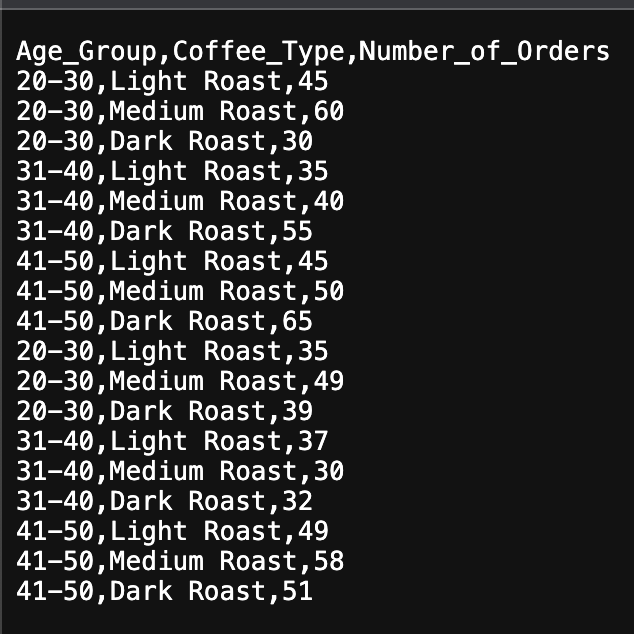

Do age groups and coffee types interact to influence the number of orders?

Conduct an appropriate hypothesis test to determine the interaction effects of the relationship at a 5% significance level.

In [77]:
df=pd.read_csv(r"C:\Users\hp\OneDrive\Desktop\python\Scaler\Hypthesis testing\coffe.csv")

test=ols('Number_of_Orders ~ C(Coffee_Type) * C(Age_Group)', data=df).fit()

annova_table=sm.stats.anova_lm(test, typ=2)
print(annova_table)

Null_Hypothesis_H0="There is no significant interaction between age group and coffee type."
Alternative_Hypothesis_H1= "There is a significant interaction between age group and coffee type."

for value in annova_table['PR(>F)']: 
    
    if value<0.05: 
        print(Alternative_Hypothesis_H1)
    else: 
        print(Null_Hypothesis_H0)

                                 sum_sq   df         F    PR(>F)
C(Coffee_Type)               143.444444  2.0  1.066061  0.384141
C(Age_Group)                 686.777778  2.0  5.104046  0.032992
C(Coffee_Type):C(Age_Group)  493.888889  4.0  1.835260  0.206332
Residual                     605.500000  9.0       NaN       NaN
There is no significant interaction between age group and coffee type.
There is a significant interaction between age group and coffee type.
There is no significant interaction between age group and coffee type.
There is no significant interaction between age group and coffee type.


In [81]:
# Based on the given problem,
# we need to analyse the independent effects of two categorical variables (coffee types & age groups) on a continuous variable (number of orders) while considering their potential interaction. Hence, we perform Two-way ANOVA to test the effects of the test.

# Based on the given problem, we define our hypotheses as:
# Null Hypothesis (H0):

# There is no significant difference in the number of orders across different coffee types.
# There is no significant difference in the number of orders across different age groups.
# There is no significant interaction effect between age group and coffee type on the number of orders.
# Alternative Hypothesis (H1):

# There is a significant difference in the number of orders across different coffee types.
# There is a significant difference in the number of orders across different age groups.
# There is a significant interaction effect between age group and coffee type on the number of orders.
# We can solve using the following code

# Code:

import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols


# Fit the linear model
model = ols('Number_of_Orders ~ C(Age_Group) * C(Coffee_Type)', data=df).fit()

# Perform two-way ANOVA
anova_table = sm.stats.anova_lm(model, typ=2)

# Print the ANOVA table
print(anova_table)
# Output:


# Based on the ANOVA table, we can analyze the effects of age group, coffee type, and their interaction on the number of orders placed at the coffee shop:
# Age Group (H0 vs. H1):

# F-statistic = 5.104046
# p-value = 0.032992
# Since the p-value is less than 0.05 (significance level), we reject the null hypothesis (H0).
# This indicates a statistically significant difference in the number of orders across different age groups.
# Coffee Type (H0 vs. H1):

# F-statistic = 1.066061
# p-value = 0.384141
# As the p-value is greater than 0.05, we fail to reject the null hypothesis (H0).
# This suggests no statistically significant difference in the number of orders across different coffee types.
# Interaction (H0 vs. H1):

# F-statistic = 1.835260
# p-value = 0.206332
# With a p-value exceeding 0.05, we fail to reject the null hypothesis (H0).
# This implies that the effect of age group on the number of orders does not significantly differ across different coffee types.
# Conclusion:
# The analysis reveals a statistically significant difference in the number of orders across different age groups.
# This indicates that age plays a role in coffee preferences and ordering behavior.
# However, the coffee type does not exhibit a significant difference in the number of orders, suggesting that overall preferences might not be heavily influenced by coffee type alone.

# There is no significant interaction effect exists between age group and coffee type, meaning that the effect of age on order numbers does not vary significantly across different coffee types.

                                 sum_sq   df         F    PR(>F)
C(Age_Group)                 686.777778  2.0  5.104046  0.032992
C(Coffee_Type)               143.444444  2.0  1.066061  0.384141
C(Age_Group):C(Coffee_Type)  493.888889  4.0  1.835260  0.206332
Residual                     605.500000  9.0       NaN       NaN


In [55]:
!gdown 1Vy0OPYInhYxuZzSn415DsguHWVH7ROe0

Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\runpy.py", line 197, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "C:\ProgramData\Anaconda3\lib\runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "C:\ProgramData\Anaconda3\Scripts\gdown.exe\__main__.py", line 7, in <module>
  File "C:\ProgramData\Anaconda3\lib\site-packages\gdown\cli.py", line 156, in main
    filename = download(
  File "C:\ProgramData\Anaconda3\lib\site-packages\gdown\download.py", line 259, in download
    filename_from_url = m.groups()[0]
AttributeError: 'NoneType' object has no attribute 'groups'


In [ ]:
df = pd.read_csv('two_way_anova.csv')

In [ ]:
df.head()

,Flavour,Location,Sales
0,Orange,West,141
1,Lemon,West,178
2,Orange,West,170
3,Orange,East,76
4,Lemon,East,170


In [ ]:
test = ols('Sales ~ C(Flavour) * C(Location)', data=df).fit()
anova_table = sm.stats.anova_lm(test, typ = 2)
print(anova_table)

                               sum_sq    df         F    PR(>F)
C(Flavour)                6919.558981   2.0  1.968465  0.145773
C(Location)               2059.273884   3.0  0.390546  0.760092
C(Flavour):C(Location)   11802.257765   6.0  1.119163  0.357804
Residual                154669.016331  88.0       NaN       NaN


sum_sq: variation in the dependent variables
df: degrees of freedom
F: F-stat
PR: probabilities associated with F-stats

alpha = 0.05 (Reject H0 if p<0.05)

1. PR - Flavour: 0.145. This is not too small -- Fail to reject
2. PR - location: 0.76. Fail to reject
3. PR - interaction: 0.35 --> fail to reject

In [ ]:
# Recovery times from 2 drugs
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
r1 = [8.82420842, 7.47774471, 7.55712098, 7.98131439, 6.82771606,
       7.48566433, 9.15385732, 5.84040502, 8.26124313, 8.4728876 ,
       6.82582186, 7.00490974, 8.43423058, 6.72099932, 6.97495982,
       5.93748053, 5.40707847, 6.16385557, 6.71421056, 4.42396183,
       6.87285228, 8.00313581, 6.69035041, 7.83622942, 8.70984957,
       5.56284584, 9.08093437, 4.98165193, 7.67769408, 6.04738478,
       7.64921582, 7.31051639, 6.74463303, 7.27356973, 8.16787232,
       6.90990965, 7.06439167, 6.62921957, 6.08283539, 6.2458137 ,
       8.65173634, 5.76080646, 6.20573219, 8.91561004, 6.22560201,
       5.67542104, 6.97412435, 8.31354697, 8.14172701, 8.26099345,
       7.87612791, 6.24835109, 9.95324783, 6.59504627, 6.17365145,
       6.05676895, 7.23030223, 7.71311809, 7.37163804, 5.69798738,
       5.71056902, 7.94556876, 7.47234105, 6.85346234, 4.77892053,
       6.92631063, 6.10681151, 7.06277198, 7.18023164, 7.78285327,
       7.85500885, 6.54349161, 8.25949958, 6.44289198, 7.16705977,
       6.03517015, 7.61274786, 7.032845  , 6.78161745, 7.07917968,
       6.21549342, 5.34267439, 6.73039933, 7.70562561, 8.15117049,
       6.72564324, 6.68220904, 8.50359274, 7.52912703, 7.34572493,
       5.95734283, 6.58259396, 6.49394335, 8.68069592, 8.60547125,
       6.8905056 , 7.72575925, 6.84801609, 7.96999724, 7.10420915]

In [ ]:
r2 = [ 9.56597358,  7.49291458,  8.73841824,  7.63523452,  4.12559277,
        7.3679259 ,  9.87873565,  6.14516559,  8.19923821,  7.30169992,
       10.24606417,  6.83814477,  7.01611267,  6.15716049,  8.29590714,
       12.3333305 ,  8.22144016,  6.06830071,  3.75820649,  6.69220157,
       10.08721618,  9.70580422,  7.31050006, 11.40145721,  5.64818498,
        7.38914449,  8.43740074,  6.3451435 ,  7.05694361,  8.1997151 ,
        9.03059061,  7.76904679,  6.92375578,  5.78318543,  8.99027781,
        7.56186529,  5.27095372,  8.32896688, 11.52935757,  7.08119961,
        9.48825066,  9.14072759,  7.30357663,  8.62183754, 10.40999814,
        8.70096763,  7.04645384,  6.378799  , 10.5098363 ,  7.36078888,
        7.33403615,  8.07396248,  6.18309499,  7.24668404,  9.03430611,
        8.99016584,  6.78606416,  8.436418  ,  6.85877947, 10.10405772,
        6.74943076,  7.57812376,  7.12920671,  9.38065269,  9.57139966,
        6.4484012 ,  6.93877043,  9.22141667,  8.34815638,  7.73980671,
        7.17840767,  9.27913457,  6.49963224,  9.92287292,  7.63978639,
        9.53931977,  9.02602273,  6.79374185,  8.59715131,  8.37747338,
        8.78161815,  6.78716383,  8.28473394,  8.20283798, 12.50518811,
       10.19772574,  8.93758457,  8.9540311 ,  8.28927558,  6.28935098,
        7.69447559,  9.66777701, 10.33898342,  8.71199578,  5.12781581,
        9.70954569,  9.13685031,  7.28989718,  8.0868909 ,  7.42937556,
        7.31356749,  9.92345816,  8.60211814,  9.33228465,  8.14132658,
        6.17871495, 10.28358242,  7.31898597,  7.95085527,  6.20331719,
        9.19119762,  6.98600628,  7.05314883, 10.57921482,  6.83637574,
        7.86199283,  8.23350975,  5.87625665,  7.78945364,  8.83612492]


In [ ]:
d1 = np.array(r1)
d2 = np.array(r2)
n1 = len(d1)
n2 = len(d2)
n1, n2

(100, 120)

In [ ]:
np.mean(d1)

7.1049166262

In [ ]:
np.mean(d2)

8.073423327583333

In [ ]:
statistic, p_value =  stats.kstest(d1, d2)
print("KS Statistic:", statistic)
print("P-value:", p_value)

KS Statistic: 0.3233333333333333
P-value: 1.516338798228849e-05


In [ ]:
if p_value > 0.01:
    print("The p-value is greater than 0.01,two samples have the same distribution.")
else:
    print("The p-value is less than or equal to 0.01, two samples have different distributions.")

The p-value is less than or equal to 0.01, two samples have different distributions.


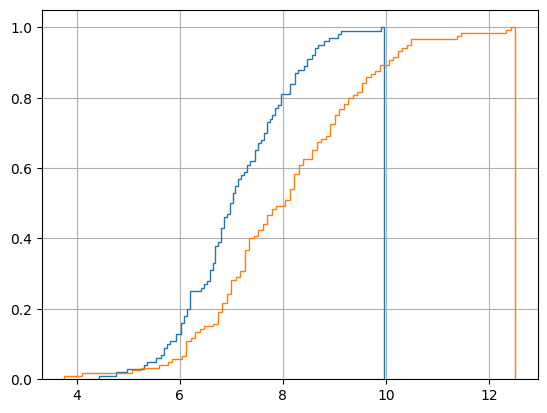

In [ ]:
plt.grid()
a = plt.hist(d1, bins=100, cumulative=True, label='CDF', density=True, histtype='step')
b = plt.hist(d2, bins=100, cumulative=True, label='CDF', density=True, histtype='step')
plt.show()

In [ ]:
# Youtube case study
import seaborn as sns
from scipy import stats


In [ ]:
!gdown 1CS513bBqabMfrUhVcqm_nhlgrQheMNZ1


Downloading...
From: https://drive.google.com/uc?id=1CS513bBqabMfrUhVcqm_nhlgrQheMNZ1
To: /content/ab_test_data.csv
100% 884k/884k [00:00<00:00, 44.7MB/s]


In [ ]:
ab_test_data = pd.read_csv("ab_test_data.csv")


In [ ]:
ab_test_data.head(10)


,date,customer_id,premium,watch_time_hrs,customer_segmnt
0,2018-09-11,402,0,7.173618,control
1,2018-02-28,227,0,0.836170,control
2,2018-10-18,812,1,4.402078,treatment
3,2018-05-22,43,0,3.982454,control
4,2018-07-18,307,0,7.513302,control
5,2018-09-10,238,0,1.456961,control
6,2018-02-21,691,1,3.800375,treatment
7,2018-04-27,199,0,4.574446,control
8,2018-05-28,105,0,3.425942,control
9,2018-09-24,604,0,3.959896,treatment


In [ ]:
sum((ab_test_data["premium"] == 0) & (ab_test_data["customer_segmnt"] == "control"))


8459

In [ ]:
sum((ab_test_data["premium"] == 1) & (ab_test_data["customer_segmnt"] == "treatment"))


2012

In [ ]:
sum((ab_test_data["premium"] == 1) & (ab_test_data["customer_segmnt"] == "control"))


1514

In [ ]:
sum((ab_test_data["premium"] == 0) & (ab_test_data["customer_segmnt"] == "treatment"))


7975

In [ ]:
ab_test_data.shape


(19960, 5)

In [ ]:
ab_test_data['customer_segmnt'].value_counts()


treatment    9987
control      9973
Name: customer_segmnt, dtype: int64

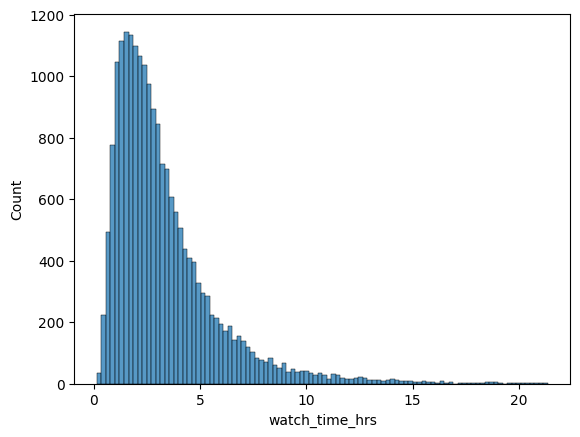

In [ ]:
sns.histplot(ab_test_data['watch_time_hrs'], bins=100)
plt.show()


In [ ]:
ab_test_data.groupby("customer_segmnt")["watch_time_hrs"].mean()


customer_segmnt
control      3.609960
treatment    3.054294
Name: watch_time_hrs, dtype: float64

In [ ]:
ab_test_control_data = ab_test_data[ab_test_data["customer_segmnt"] == "control"]
ab_test_treatment_data = ab_test_data[ab_test_data["customer_segmnt"] == "treatment"]


In [ ]:
ab_test_control_data.shape[0]


9973

In [ ]:
ab_test_treatment_data.shape[0]


9987

In [ ]:
statistic, p_value = stats.ttest_ind(ab_test_control_data["watch_time_hrs"], ab_test_treatment_data["watch_time_hrs"])
print("Test Statistic:", statistic)
print("P-value:", p_value)

Test Statistic: 15.96034913022092
P-value: 5.438408586231319e-57
